In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
import glob

In [7]:
data = {}
for folder in glob.glob("./data/*"):
    f_name = folder.split("\\")[1]
    if f_name not in data:
        n_files = glob.glob(f"{folder}\*.jpg")
        data[f_name] = len(n_files)
        print(f_name, len(n_files))


+ 25112
- 33997
0 6914
1 26520
2 26141
3 10909
4 7396
5 3545
6 3118
7 2909
8 3068
9 3737
= 13104
div 868
times 3251
u 1269
v 1558
w 556
X 26594
y 9340
z 5870


In [8]:
sorted(data.items(), key = lambda x:x[1], reverse=True)

[('-', 33997),
 ('X', 26594),
 ('1', 26520),
 ('2', 26141),
 ('+', 25112),
 ('=', 13104),
 ('3', 10909),
 ('y', 9340),
 ('4', 7396),
 ('0', 6914),
 ('z', 5870),
 ('9', 3737),
 ('5', 3545),
 ('times', 3251),
 ('6', 3118),
 ('8', 3068),
 ('7', 2909),
 ('v', 1558),
 ('u', 1269),
 ('div', 868),
 ('w', 556)]

In [16]:
data.values()

dict_values([25112, 33997, 6914, 26520, 26141, 10909, 7396, 3545, 3118, 2909, 3068, 3737, 13104, 868, 3251, 1269, 1558, 556, 26594, 9340, 5870])

In [34]:
! pip install seaborn

     ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
     ------------- ------------------------ 102.4/294.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 294.6/294.6 kB 4.6 MB/s eta 0:00:00


In [28]:
import seaborn as sns
import pandas as pd

In [29]:
df = pd.DataFrame()
df["Distribution"] = list(data.values())
df["Classes"] = list(data.keys())

In [32]:
df.head()

,Distribution,Classes
0,25112,+
1,33997,-
2,6914,0
3,26520,1
4,26141,2


In [33]:
df = df.sort_values("Distribution", ascending=False)

In [34]:
df

,Distribution,Classes
1,33997,-
18,26594,X
3,26520,1
4,26141,2
0,25112,+
12,13104,=
5,10909,3
19,9340,y
6,7396,4
2,6914,0


In [39]:
df["Classes"]

1         -
18        X
3         1
4         2
0         +
12        =
5         3
19        y
6         4
2         0
20        z
11        9
7         5
14    times
8         6
10        8
9         7
16        v
15        u
13      div
17        w
Name: Classes, dtype: object

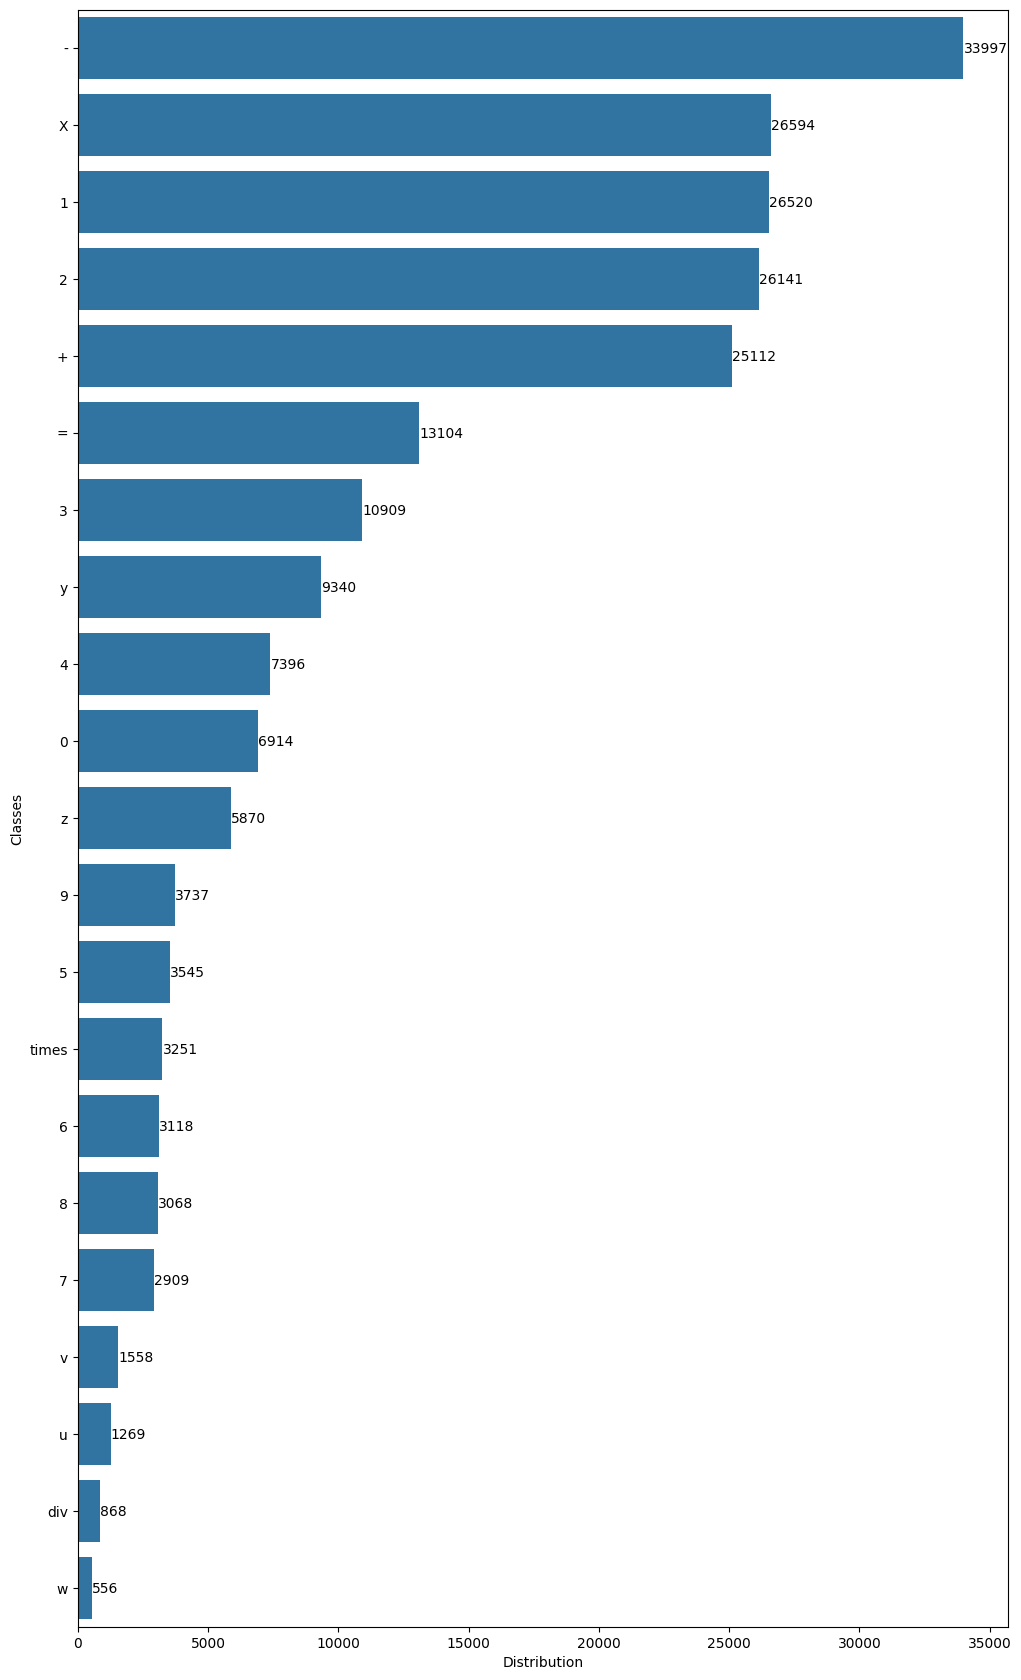

In [35]:
plt.figure(figsize=(12,21))
ax = sns.barplot(y="Classes", x="Distribution", data=df)
ax.bar_label(ax.containers[0])
plt.show()

In [74]:
next_X = 0
next_Y = 2
N = 3

In [76]:
isWithinBounds = (next_X >= 0 and next_X <= N-1) and (next_Y >= 0 and next_Y <= N-1)

In [77]:
isWithinBounds

True

In [94]:
#User function Template for python3

class Solution:
    
    def canMoveInDirection(self, matrix, current_coords, direction, locations_table, N):
        # if matrix[direction] == 1 and locations_table[direction] != 1 and next cell is within bounds
        
        isWithinBounds = True
        if direction == "D":
            next_coords = (current_coords[0] + 1, current_coords[1])
        elif direction == "L":
            next_coords = (current_coords[0], current_coords[1] - 1)
        elif direction == "R":
            next_coords = (current_coords[0], current_coords[1] + 1)
        else:
            next_coords = (current_coords[0] - 1, current_coords[1])
        
        next_X, next_Y = next_coords
        # print(f"Next coords {next_coords}, locations_table {locations_table}")
        isWithinBounds = (next_X >= 0 and next_X <= N-1) and (next_Y >= 0 and next_Y <= N-1)
        
        return (isWithinBounds and (matrix[next_X][next_Y] == 1) and (locations_table[next_X][next_Y] == 0))
    
    
    def solve(self, matrix, current_coords, locations_table, local_result, final_result, N):
        if current_coords == (N-1, N-1):
            # print(f"Found the path to the end {local_result}, final result {final_result}")
            final_result.append(str(local_result))
            return
        
        for direction in ["D","L","R","U"]:
            temp_result = local_result
            
            if self.canMoveInDirection(matrix, current_coords, direction, locations_table, N):
                local_result += direction
                locations_table[current_coords[0]][current_coords[1]] = 1
                temp_coords = current_coords
                
                if direction == "D":
                    current_coords = (current_coords[0] + 1, current_coords[1])
                elif direction == "L":
                    current_coords = (current_coords[0], current_coords[1] - 1)
                elif direction == "R":
                    current_coords = (current_coords[0], current_coords[1] + 1)
                else:
                    current_coords = (current_coords[0] - 1, current_coords[1])
                    
                self.solve(matrix, current_coords, locations_table, local_result, final_result, N)
                
                current_coords = temp_coords
                # print(f"current coords {current_coords}, locations_table")
                locations_table[current_coords[0]][current_coords[1]] = 0
                
            local_result = temp_result
                
        
        
    def findPath(self, m, n):
        # code here
        final_result = []
        locations_table = []
        for i in range(n):
            locations_table.append([0]*n)
        # print(locations_table[0][0])
    
        # print(m[0][1])
        # self, matrix, current_coords, locations_table, local_result, final_result, N
        self.solve(m, (0,0), locations_table, "", final_result, n)
        
        return final_result
        


#{ 
 # Driver Code Starts
#Initial Template for Python 3

if __name__=='__main__':
    t = 1
    
    for i in range(t):
        n = [4]
        arr = list(map(int, "1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1".strip().split()))
        
        matrix = [[0 for i in range(n[0])]for j in range(n[0])]
        k=0
        for i in range(n[0]):
            for j in range(n[0]):
                matrix[i][j] = arr[k]
                k+=1
        ob = Solution()
        result = ob.findPath(matrix, n[0])
        result.sort()
        if len(result) == 0 :
            print(-1)
        else:
            for x in result:
                print(x,end = " ")
            print()
# } Driver Code Ends

Next coords (1, 0), locations_table [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Next coords (2, 0), locations_table [[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Next coords (3, 0), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Next coords (2, -1), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Next coords (2, 1), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
Next coords (3, 1), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 0]]
Next coords (4, 1), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0]]
Next coords (3, 0), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0]]
Next coords (3, 2), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0]]
Next coords (4, 2), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 0], [0, 1, 0, 0]]
Next coords (3, 1), locations_table [[1, 0, 0, 0], [1, 0, 0, 0], [1, 

In [99]:
"".join([str(i) for i in list((range(1, 9)))])

'12345678'